# Testing

Notebook for developing and testing the package. 

In [1]:
import sys
sys.path.append('../')
from fancy import *

In [2]:
# data
source_file = '../../uhecr_model/data/agn_catalog.dat'

my_data = Data()
my_data.add_source(source_file, 'AGN')

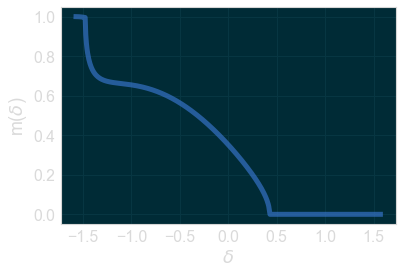

In [3]:
# detector 
auger_coords = [-35.5, -69.3] # lat, lon in degrees
threshold_zenith_angle = 60 # degrees
area = 3000 # km^2
total_exposure = 20370 # km^2 sr year

my_data.add_detector(auger_coords, threshold_zenith_angle, 
                  area, total_exposure, label = 'Auger')

# plot the exposure (this can take ~15 s to run...)
my_data.detector['Auger'].show(view = 'decplot', cmap = 'vaporwave')

In [4]:
# model
model_name = '../../uhecr_model/stan/detection_effects_soia.stan'
sim_name = '../../uhecr_model/stan/detection_effects_soia_sim.stan'
my_model = Model(model_name, sim_name)

F_T = 0.2 # CR km^-2 year^-1
f = 0.5
kappa = 100
kappa_c = 1000

my_model.simulation_inputs(F_T, f, kappa, kappa_c)
my_model.compile()

Using cached StanModel
Using cached StanModel


In [5]:
# integral tables
table_file = 'test.data.R'
sim_table_file = 'test_sim.data.R'

my_analysis = Analysis(my_data, my_model)
#my_analysis.build_tables(10, table_file, sim_table_file)

100 1.201557512634381 5.452221618508282e-08
100 1.0300113027976376 1.4020544632330775e-08
100 0.37195434111480496 1.815809901902334e-08
100 0.6379834214067539 1.4462840281083136e-08
100 1.142031522133809 6.079287383612427e-08
100 1.100746795398629 2.9750611043856618e-08
100 1.0604630574281795 3.722695876198999e-08
100 0.3868097725842369 2.06740454373005e-08
100 0.37322810208573876 1.4915296286039704e-08
100 3.311260800548478e-05 1.1581297964125685e-08
100 1.164827256351186 6.781159702671716e-08
100 0.0026103166088811856 1.4406306819174715e-08
100 1.1330402398205792 1.4774091931759019e-08
100 5.329054315526662e-06 1.3540616867627612e-08
100 5.063633410252023e-06 1.2696915907696422e-08
100 1.1395006559598593 6.467601158217528e-08
100 1.2051487665713363 6.098743289605667e-08
10.0 1.1843880163034637 2.0962772902949345e-08
10.0 0.9765912065866652 1.4292645341277655e-08
10.0 0.38794708375327525 1.4698241777107748e-08
10.0 0.6035770798933026 1.4890565942995038e-08
10.0 1.0956057649313349 1.45

1000.0 1.0355035323005217 1.8552971146629932e-07
1000.0 0.3814550213205549 2.0351658185257143e-08
1000.0 0.6418409032505797 1.4802484822133948e-08
1000.0 1.1472427057381718 1.2865933061989576e-07
1000.0 1.1062701120222098 6.79601538123891e-08
1000.0 1.0660152663597784 1.7312099717404306e-07
1000.0 0.3955397461162224 4.922890663132799e-08
1000.0 0.38266156053620937 5.9020613234021024e-08
1000.0 1.9817933760437155e-41 3.902962807183222e-40
1000.0 1.1695450861519534 9.056694706021016e-08
1000.0 6.619648569762111e-20 1.2857437849307632e-18
1000.0 1.138361692360094 1.3611645475310218e-08
1000.0 1.8459877388987075e-50 3.460714563235031e-49
1000.0 1.0291626405646684e-50 1.9243096944747356e-49
1000.0 1.1447462923497063 1.4794464607338322e-08
1000.0 1.2058562013287464 1.471910195372753e-08



In [6]:
# integral tables already built
my_analysis.use_tables(table_file, sim_table_file)

In [10]:
# simulate
my_analysis.simulate()
my_analysis.save_simulated_data('sim_data.data.R')
#my_analysis.use_simulated_data('sim_data.data.R')

/Users/fran/projects/bayes/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1 0.4148405206834478
2 0.2672629228301495
3 0.32212990927761753
4 0.9740339658478077
5 0.9227385989381519
6 0.5815441674759028
7 0.6364954102539657
8 0.9628892354247313
9 0.729074164347814
10 0.29593233836854305
11 1.0226526134521206
12 0.8632584842640221
13 0.33272365382173197
14 0.8218200183172621
15 0.6527551898441505
16 0.640016466506419
17 0.6754635341486431
18 0.5172655705736187
19 0.8906169736559878
20 0.7784552309354731
21 0.222918235516248
22 0.5026794317975805
23 1.0219534510861723
24 0.6287439375980797
25 0.7290991887518512
26 0.2702025241157573
27 1.0421861733948945
28 0.8281199881106974
29 0.9856603069645538
30 0.8334047535245848
31 0.9634702069801223
32 0.7777000312751842
33 0.6242819863388753
34 1.0310172462690848
35 0.6064821042623034
36 0.5936821716047388
37 0.3976546326777042
38 0.4084880735395582
39 0.2563369215666318
40 0.4266249916623972
41 0.8726321021983298
42 0.3975588132307386
43 0.5480858717065265
44 0.5580221255292495
45 0.25291236137012896
46 0.9478734415532

366 0.7145059288879273
367 0.5181727552384308
368 0.33544652244584094
369 0.7049037401274469
370 0.5928514287949873
371 0.25600812133338025
372 0.7108303500438511
373 1.0459170479485473
374 0.05293079842449311
375 0.4403860950319882
376 0.9305134419346496
377 1.0032726398598388
378 0.9944502309440008
379 0.8007435020730358
380 0.593991014295366
381 0.2803721203997407
382 0.3358064918331076
383 0.5962793983109546
384 0.6672161376087414
385 0.12793417333556367
386 0.9769185424507307
387 1.011637882786443
388 0.18781581071838893
389 0.6267557899366911
390 0.19696630017764116
391 0.41587335209940135
392 0.3590479516362268
393 0.40246046981099126
394 0.9887294805273108
395 0.71488906721262
396 0.6337998967925815
397 0.5064606844111155
398 0.5587811550878385
399 0.2646256801431657
400 0.3392655631875878
401 0.931496653980637
402 0.8005630842670395
403 0.9138348243331111
404 0.7750079681587879
405 0.6161739444249736
406 0.8779478686428555
407 0.8919425520996279
408 0.2616212409404024
409 0.59

/Users/fran/projects/bayes/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


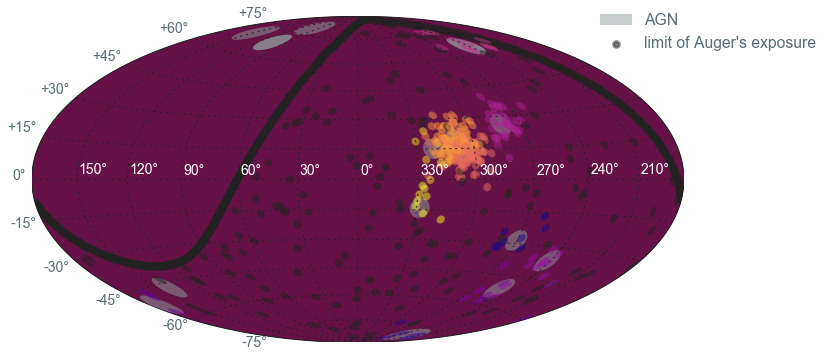

In [11]:
# plot
my_analysis.plot_simulation()

In [12]:
# fit
my_fit = my_analysis.fit_model()

/Users/fran/projects/bayes/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 2000 iterations saturated the maximum tree depth of 10 (0.0%)
0.0 of 2000 iterations ended with a divergence (0.0%)
E-BFMI indicated no pathological behavior


In [13]:
print(my_fit)

Inference for Stan model: anon_model_c3c5b9c4edb62652d5f1ca45ce66ac93.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
F_T       0.22  2.9e-4   0.01    0.2   0.21   0.22   0.23   0.24   1380    1.0
f         0.51  7.6e-4   0.03   0.46   0.49   0.51   0.53   0.57   1391    1.0
kappa   114.98    0.65  18.43  89.11 102.85 110.55 123.67 162.05    813   1.01
kappa_c 1039.5   14.22 478.55 275.04  632.9 1012.1 1432.4 1920.8   1133    1.0
F[0]    2.1e-3  3.3e-6 1.3e-4 1.8e-3 2.0e-3 2.1e-3 2.2e-3 2.3e-3   1684    nan
F[1]    1.9e-3  3.1e-6 1.3e-4 1.7e-3 1.8e-3 1.9e-3 2.0e-3 2.2e-3   1684    nan
F[2]    2.9e-3  4.6e-6 1.9e-4 2.5e-3 2.7e-3 2.9e-3 3.0e-3 3.3e-3   1684    nan
F[3]    2.3e-3  3.7e-6 1.5e-4 2.0e-3 2.2e-3 2.3e-3 2.4e-3 2.6e-3   1684    nan
F[4]    3.3e-3  5.2e-6 2.1e-4 2.9e-3 3.1e-3 3.3e-3 3.4e-3 3.7e-3   1684    nan
F[5]    2.8e-3  4.4e-6 